In [18]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV # Create the parameter grid based on the results of random search 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Flatten

data = pd.read_csv(r'\2021+historical data (happiness score).csv')
data_2021 = data.iloc [0:148]

In [14]:
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  2100 non-null   object 
 1   year                          2100 non-null   int64  
 2   Ladder score                  2100 non-null   float64
 3   Logged GDP per capita         2064 non-null   float64
 4   Social support                2087 non-null   float64
 5   Healthy life expectancy       2045 non-null   float64
 6   Freedom to make life choices  2068 non-null   float64
 7   Generosity                    2011 non-null   float64
 8   Perceptions of corruption     1990 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 147.8+ KB


Country name                      0
year                              0
Ladder score                      0
Logged GDP per capita            36
Social support                   13
Healthy life expectancy          55
Freedom to make life choices     32
Generosity                       89
Perceptions of corruption       110
dtype: int64

In [15]:
# fill in the na value by mean
mean = data["Logged GDP per capita"].mean()
data["Logged GDP per capita"].fillna(mean,inplace = True)

mean = data["Social support"].mean()
data["Social support"].fillna(mean,inplace = True)

mean = data["Healthy life expectancy"].mean()
data["Healthy life expectancy"].fillna(mean,inplace = True)

mean = data["Freedom to make life choices"].mean()
data["Freedom to make life choices"].fillna(mean,inplace = True)

mean = data["Generosity"].mean()
data["Generosity"].fillna(mean,inplace = True)

mean = data["Perceptions of corruption"].mean()
data["Perceptions of corruption"].fillna(mean,inplace = True)

data.isnull().sum()

test_data = data.iloc [0:148] # 2021 data as test 
train_data = data.iloc [149:] # other histroal data as train set

test_data = test_data.iloc[:,2:] # remove country and year in data
train_data = train_data.iloc[:,2:] # remove country and year in data

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

train_X = train_data[:,1:7]
test_X = test_data[:,1:7]
# X is our input variables

train_Y = train_data[:,0]
test_Y = test_data[:,0]

train_X = train_X.reshape((train_X.shape[0], train_X.shape[1], 1))
test_X = test_X.reshape((test_X.shape[0], test_X.shape[1], 1))
print(train_X.shape)

(1951, 6, 1)


In [7]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV # Create the parameter grid based on the results of random search 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Flatten


def generate_model(optimizer='adam'):
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=2,strides = 1 , activation='relu',padding = 'same', input_shape=(train_X.shape[1], train_X.shape[2])))
    model.add(Conv1D(filters=32, kernel_size=2,strides = 1 , activation='relu',padding = 'same', ))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mse')
    return model
param_distribs = {
        'batch_size' : range(2,300),
        'epochs' : range(2,300),
        'optimizer' : ['adam','sgd','rmsprop','Adagrad'] 
}
model = KerasRegressor(build_fn=generate_model, verbose=1 , validation_data=(test_X,test_Y))
    
grid = RandomizedSearchCV(estimator=model, param_distributions = param_distribs, cv=3,n_iter=20,scoring='neg_mean_squared_error')

grid_search = grid.fit(train_X, train_Y )
grid_search.best_params_

C:\Users\henry\AppData\Local\Temp/ipykernel_18684/3367357902.py:31: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=generate_model, verbose=1 , validation_data=(test_X,test_Y))


Epoch 1/243
9/9 [==============================] - 1s 46ms/step - loss: 0.8275 - val_loss: 0.6404
Epoch 2/243
9/9 [==============================] - 0s 8ms/step - loss: 0.5803 - val_loss: 0.2855
Epoch 3/243
9/9 [==============================] - 0s 8ms/step - loss: 0.4330 - val_loss: 0.2215
Epoch 4/243
9/9 [==============================] - 0s 8ms/step - loss: 0.3938 - val_loss: 0.2616
Epoch 5/243
9/9 [==============================] - 0s 8ms/step - loss: 0.3598 - val_loss: 0.2134
Epoch 6/243
9/9 [==============================] - 0s 8ms/step - loss: 0.3431 - val_loss: 0.2169
Epoch 7/243
9/9 [==============================] - 0s 9ms/step - loss: 0.3248 - val_loss: 0.2217
Epoch 8/243
9/9 [==============================] - 0s 8ms/step - loss: 0.3177 - val_loss: 0.2058
Epoch 9/243
9/9 [==============================] - 0s 9ms/step - loss: 0.3116 - val_loss: 0.2095
Epoch 10/243
9/9 [==============================] - 0s 9ms/step - loss: 0.3040 - val_loss: 0.2079
Epoch 11/243
9/9 [==========

{'optimizer': 'sgd', 'epochs': 277, 'batch_size': 146}

In [19]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2,strides = 1 , activation='relu',padding = 'same', input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Conv1D(filters=32, kernel_size=2,strides = 1 , activation='relu',padding = 'same', ))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.compile(optimizer='sgd', loss='mse')

history = model.fit(train_X, train_Y, epochs=277, verbose=1,batch_size = 146,validation_data=(test_X, test_Y))


Epoch 1/277
14/14 [==============================] - 1s 20ms/step - loss: 0.9302 - val_loss: 0.7656
Epoch 2/277
14/14 [==============================] - 0s 7ms/step - loss: 0.8442 - val_loss: 0.6691
Epoch 3/277
14/14 [==============================] - 0s 7ms/step - loss: 0.7739 - val_loss: 0.5755
Epoch 4/277
14/14 [==============================] - 0s 7ms/step - loss: 0.7017 - val_loss: 0.4865
Epoch 5/277
14/14 [==============================] - 0s 7ms/step - loss: 0.6240 - val_loss: 0.4024
Epoch 6/277
14/14 [==============================] - 0s 7ms/step - loss: 0.5546 - val_loss: 0.3444
Epoch 7/277
14/14 [==============================] - 0s 7ms/step - loss: 0.5105 - val_loss: 0.2956
Epoch 8/277
14/14 [==============================] - 0s 7ms/step - loss: 0.4855 - val_loss: 0.2699
Epoch 9/277
14/14 [==============================] - 0s 7ms/step - loss: 0.4689 - val_loss: 0.2589
Epoch 10/277
14/14 [==============================] - 0s 7ms/step - loss: 0.4441 - val_loss: 0.2493
Epoch 11

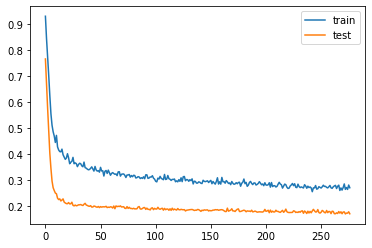

In [20]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [21]:
pred = model.predict(test_X)
pred = pred.reshape(pred.shape[0],1) # inverse the StandardScaler
pred_copy = np.repeat(pred,7,axis=-1)
pred = scaler.inverse_transform(pred_copy)[:,0]


test_Y = test_Y.reshape(test_Y.shape[0],1) # inverse the StandardScaler
test_Y_copy = np.repeat(test_Y,7,axis=-1)
test_Y = scaler.inverse_transform(test_Y_copy)[:,0]

from sklearn.metrics import mean_squared_error
mean_squared_error(test_Y,pred) # find mse 

0.2116370304550508

In [22]:
import geopandas as gpd

In [23]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


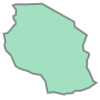

In [24]:
world['geometry'][1]

In [25]:
country_data = list(data_2021['Country name'].unique())
country_geo = list(world['name'])

country_diff = [country for country in country_data if country not in country_geo]
country_diff

['Czech Republic',
 'United States',
 'Bahrain',
 'Malta',
 'Taiwan Province of China',
 'Singapore',
 'Mauritius',
 'Bosnia and Herzegovina',
 'Dominican Republic',
 'North Cyprus',
 'Hong Kong S.A.R. of China',
 'Congo (Brazzaville)',
 'Ivory Coast',
 'Maldives',
 'North Macedonia',
 'Palestinian Territories',
 'Swaziland',
 'Comoros']

In [26]:
data_2021['Country name'] = data_2021['Country name'].replace({'United States' : 'United States of America',
                                          'Taiwan Province of China':'Taiwan',
                                          'Bosnia and Herzegovina':'Bosnia and Herz.',
                                          'Dominican Republic':'Dominican Rep.',
                                          'North Cyprus':'N. Cyprus',
                                          'Swaziland':'Switzerland'})

C:\Users\henry\AppData\Local\Temp/ipykernel_9680/2380443316.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2021['Country name'] = data_2021['Country name'].replace({'United States' : 'United States of America',


In [27]:
def plot_on_worldmap(df, col_to_map, title=None):
    # Plotting on world map
    mapped = world.set_index('name').join(df.set_index('Country name')).reset_index() # Joins the df with world data for plotting

    to_be_mapped = col_to_map # The column name which is to shown on map
    vmin, vmax = df[col_to_map].min(), df[col_to_map].max()# Minimum and maximum values for the column

    fig, ax = plt.subplots(1, figsize=(20,10))

    mapped.dropna().plot(column=to_be_mapped, cmap='Blues', linewidth=0.8,legend=True, ax=ax, 
                         edgecolors='0.8', legend_kwds={'shrink': 0.5})

    ax.set_title(title, fontdict={'fontsize':20})

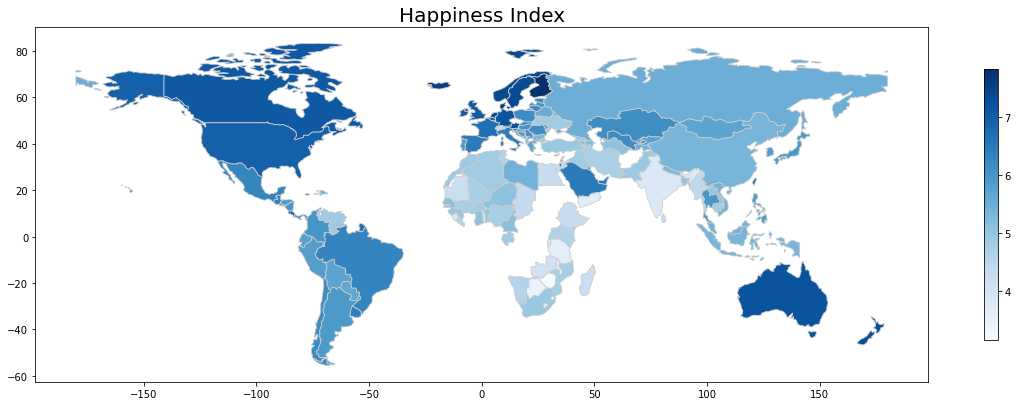

In [28]:
plot_on_worldmap(data_2021, 'Ladder score', 'Happiness Index')

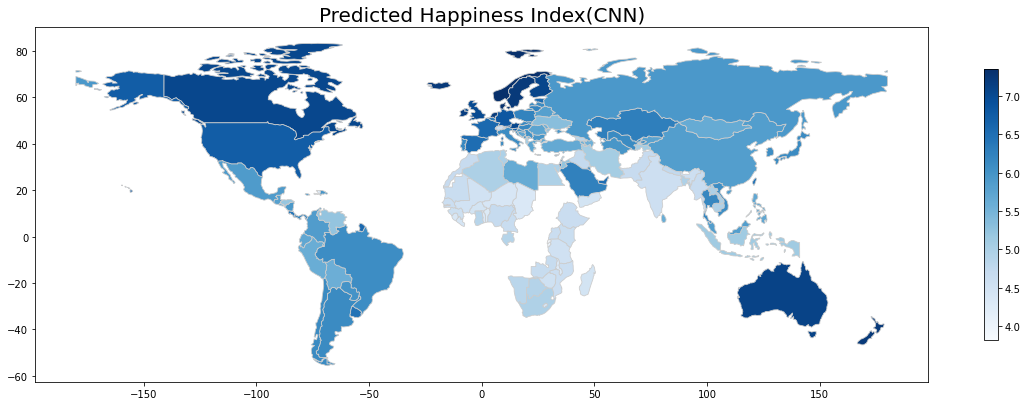

In [29]:
name = data_2021['Country name']
df_cols = ['pred_score','Country name']
pred = pd.Series(pred,name = 'pred score')

pred_data = pd.concat([name,pred],axis=1)
plot_on_worldmap(pred_data, 'pred score', 'Predicted Happiness Index(CNN)')
